In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
?dplyr

dplyr-package {dplyr},R Documentation


# Split, apply, combine (and arrange/sort)

## `dplyR` "verbs"

- `group_by`
- `summarize`
- `arrange`
- `mutate`

# What is that weird `%>%`?

In [3]:
iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [5]:
iris %>%
    group_by(Species) %>%
    select(Sepal.Length, Species) %>%
    filter(Sepal.Length > 4) %>%
    summarize(mean.Sepal.Length = mean(Sepal.Length))

Species,mean.Sepal.Length
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


In [6]:
summarize(filter(select(group_by(iris, Species), Species, Sepal.Length), Sepal.Length > 4), mean.Sepal.Length = mean(Sepal.Length))

Species,mean.Sepal.Length
<fct>,<dbl>
setosa,5.006
versicolor,5.936
virginica,6.588


# group_by

In [7]:
iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [8]:
iris %>%
    group_by(Species) %>% 
    head

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [9]:
iris %>%
    pivot_longer(-Species) %>%
    head

Species,name,value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Width,3.5
setosa,Petal.Length,1.4
setosa,Petal.Width,0.2
setosa,Sepal.Length,4.9
setosa,Sepal.Width,3.0


In [10]:
iris %>%
    pivot_longer(-Species) %>%
    group_by(name) %>%
    head

Species,name,value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Width,3.5
setosa,Petal.Length,1.4
setosa,Petal.Width,0.2
setosa,Sepal.Length,4.9
setosa,Sepal.Width,3.0


# summarize

In [11]:
iris %>%
    summarize(median.Sepal.Length = median(Sepal.Length))

median.Sepal.Length
<dbl>
5.8


In [12]:
iris %>%
    group_by(Species) %>%
    summarize(median.Sepal.Length = median(Sepal.Length))

Species,median.Sepal.Length
<fct>,<dbl>
setosa,5.0
versicolor,5.9
virginica,6.5


In [13]:
# What about max Sepal.Length by Species?

iris %>%
   group_by(Species) %>%
   summarize(max.Sepal.Length = max(Sepal.Length))

Species,max.Sepal.Length
<fct>,<dbl>
setosa,5.8
versicolor,7.0
virginica,7.9


## group size

In [14]:
iris %>%
    group_by(Species) %>%
    summarize(N = n())

Species,N
<fct>,<int>
setosa,50
versicolor,50
virginica,50


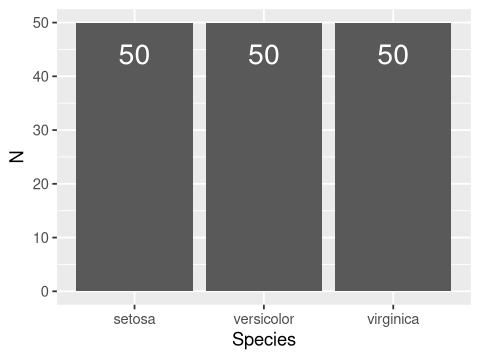

In [15]:
options(repr.plot.width = 4, repr.plot.height = 3)
df = iris %>%
    group_by(Species) %>%
    summarize(N = n())

ggplot(df, aes(x = Species, y = N, label = N)) +
    geom_col() + 
    geom_text(color = 'white', vjust = 2, size = 6)

In [16]:
iris %>%
    group_by(Species) %>%
    count()

Species,n
<fct>,<int>
setosa,50
versicolor,50
virginica,50


# arrange

In [17]:
iris %>%
    group_by(Species) %>%
    summarize(median.Sepal.Length = median(Sepal.Length))

Species,median.Sepal.Length
<fct>,<dbl>
setosa,5.0
versicolor,5.9
virginica,6.5


In [18]:
iris %>%
    group_by(Species) %>%
    summarize(median.Sepal.Length = median(Sepal.Length)) %>%
    arrange(median.Sepal.Length)

Species,median.Sepal.Length
<fct>,<dbl>
setosa,5.0
versicolor,5.9
virginica,6.5


In [19]:
iris %>%
    group_by(Species) %>%
    summarize(median.Sepal.Length = median(Sepal.Length)) %>%
    arrange(desc(median.Sepal.Length))

Species,median.Sepal.Length
<fct>,<dbl>
virginica,6.5
versicolor,5.9
setosa,5.0


# mutate

In [19]:
iris %>%
    mutate(p.width2length = Petal.Width / Petal.Length) %>%
    head

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,p.width2length
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
5.1,3.5,1.4,0.2,setosa,0.1428571
4.9,3.0,1.4,0.2,setosa,0.1428571
4.7,3.2,1.3,0.2,setosa,0.1538462
4.6,3.1,1.5,0.2,setosa,0.1333333
5.0,3.6,1.4,0.2,setosa,0.1428571
5.4,3.9,1.7,0.4,setosa,0.2352941


In [20]:
iris %>%
    mutate(p.width2length = Petal.Width / Petal.Length) %>%
    group_by(Species) %>%
    summarize(max.p.width2length = max(p.width2length)) %>%
    arrange(-max.p.width2length)

Species,max.p.width2length
<fct>,<dbl>
virginica,0.4705882
versicolor,0.3750000
setosa,0.3750000
